# Ensaios de teste RTL-SDR
Teste do SDRPlay para verificar condições de operação quando comparado ao SDRPlay

## Imports

In [1]:
from pylab import *
from rtlsdr import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import psd
import control

## Parâmetros de ensaio

In [2]:
sample_rate = 1e6
center_freq = 92.1e6 + 250e3
measure_freq = center_freq - 250e3

## Funções estruturantes

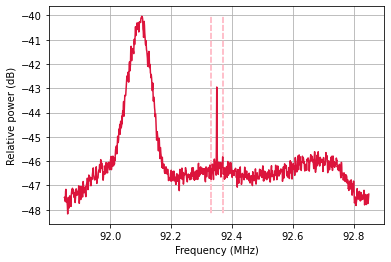

Na frequência 92.1 a magnitude é de -40.289604588994585 dB


In [3]:
def fazer_aquisicao(sample_rate, center_freq, freq_correction, gain):
    if sample_rate < 1e6:
        print("sample_rate precisa estar entre 1e6 e 2e6")
        return
    if gain < 1:
        print("gain precisa ser maior igual a 1")
    if freq_correction < 1:
        print("freq_correction precisa ser maior igual a 1")
        return    
    sdr = RtlSdr()
    sdr.sample_rate = sample_rate
    sdr.center_freq = center_freq
    sdr.freq_correction = freq_correction
    sdr.gain = gain
    samples = sdr.read_samples(1024*512)
    sdr.close()
    return samples

def fazer_grafico(samples, sample_rate, center_freq):
    if sample_rate < 1e6:
        print("sample_rate precisa ser maior igual a 1e6")
        return
    if center_freq < 1e6:
        print("center_freq precisa ser maior igual a 1e6")
        return    
    NFFT = 1024
    plt.figure()
    axes = plt.psd(samples, NFFT=NFFT, Fs=sample_rate/1e6, Fc=center_freq/1e6, zorder=10, color='crimson')
    x = np.ones(len(axes[0]))*center_freq/1e6
    dx = (((sample_rate)/1e6)/2)/25
    plt.plot(x+dx, 10*np.log10(axes[0]), color='pink', linestyle='dashed', zorder=5)
    plt.plot(x-dx, 10*np.log10(axes[0]), color='pink', linestyle='dashed', zorder=5)
    
    
    xlabel('Frequency (MHz)')
    ylabel('Relative power (dB)') 
    show()
    
def obter_magnitude(freq, samples, sample_rate, center_freq, measure_freq):
    if sample_rate < 1e6:
        print("sample_rate precisa ser maior igual a 1e6")
        return
    if center_freq < 1e6:
        print("center_freq precisa ser maior igual a 1e6")
        return
    sample_rate = sample_rate/1e6
    center_freq = center_freq/1e6
    measure_freq = measure_freq/1e6
    freq = freq/1e6
    NFFT = 1024
    axes = psd(samples, NFFT=NFFT, Fs=sample_rate)
    y = 10*np.log10(axes[0])
    x = axes[1] + center_freq
    i = find_nearest(x, measure_freq)    
    return x[i],y[i]

def find_nearest(array, value):
    #https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def obter_magnitude_sem_ganho(mag, ganho):
    amp = control.db2mag(mag)/ganho
    return 20*np.log10(amp)

samples = fazer_aquisicao(
    sample_rate = sample_rate,
    center_freq = center_freq,
    freq_correction = 60,
    gain = 1
)
samples = samples - np.mean(samples)
fazer_grafico(
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)

freq, mag = obter_magnitude(
    freq = center_freq,
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq,
    measure_freq = measure_freq
)

print("Na frequência", freq, "a magnitude é de", mag, "dB")

## Medição G=1; freq_correction=60 c/ média subtraída

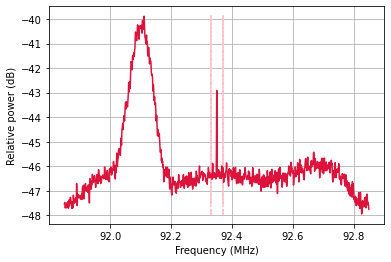

Na frequência 92.1 a magnitude é de -40.293319059708715 dB


In [4]:
samples = fazer_aquisicao(
    sample_rate = sample_rate,
    center_freq = center_freq,
    freq_correction = 60,
    gain = (1) #era 16
)
samples = samples - np.mean(samples)
fazer_grafico(
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)

freq, mag = obter_magnitude(
    freq = center_freq,
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq,
    measure_freq = measure_freq
)

print("Na frequência", freq, "a magnitude é de", mag, "dB")

## Medição G=7; freq_correction=60 c/ média subtraída

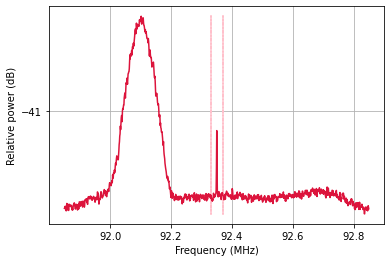

Na frequência 92.1 a magnitude é de -33.71883747387125 dB


In [5]:
samples = fazer_aquisicao(
    sample_rate = sample_rate,
    center_freq = center_freq,
    freq_correction = 60,
    gain = 7
)
samples = samples - np.mean(samples)
fazer_grafico(
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)

freq, mag = obter_magnitude(
    freq = center_freq,
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq,
    measure_freq = measure_freq
)

print("Na frequência", freq, "a magnitude é de", mag, "dB")